In [1]:
from sympy import *
from sympy.physics import mechanics
mechanics.mechanics_printing()
t = Symbol('t')
y = Function('y')(t)
g = Symbol('g')
C = Symbol('C')

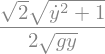

In [2]:
f = sqrt(1 + diff(y)**2) / sqrt(2 * g * y)
f

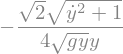

In [3]:
lhs = diff(f, y)
lhs

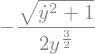

In [4]:
lhs *= sqrt(2 * g * y)
lhs /= sqrt(y)
lhs = lhs.simplify()
lhs

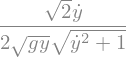

In [5]:
rhs = diff(f, diff(y))
rhs

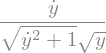

In [6]:
rhs *= sqrt(2 * g * y)
rhs /= sqrt(y)
rhs = rhs.simplify()
rhs

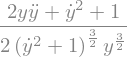

In [7]:
eq = (diff(rhs, t) - lhs).simplify()
eq

In [8]:
subs_cons = 2 * y**(3/2) * (diff(y, t)**2 + 1)**(3/2)
subs_cons

In [9]:
eq = eq * subs_cons
expand(eq)

In [10]:
eq = expand((eq) * (diff(y, t)))
eq

In [11]:
eq = y + y * diff(y)**2 - C
eq

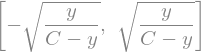

In [12]:
solve(eq, 1/diff(y))

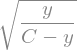

In [13]:
eq = solve(eq, 1/diff(y))[1]
eq

In [14]:
subs_par1 = [y,
             C * sin(t)**2]
subs_par1

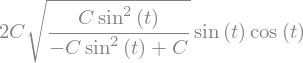

In [15]:
eq = eq.subs(subs_par1[0], subs_par1[1]) * diff(subs_par1[1], t)
eq

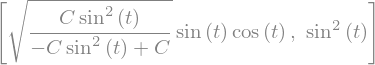

In [16]:
subs_par2 = [sqrt(subs_par1[1] / (C - subs_par1[1])) * sin(t) * cos(t), 
             sin(t)**2]
subs_par2

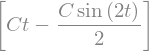

In [17]:
sol = [Integral(eq.subs(subs_par2[0], subs_par2[1]), t).doit().trigsimp().expand()]
sol

In [18]:
subs_par3 = [sin(t)**2,
             1/2 * (1 - cos(2*t))]

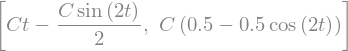

In [19]:
sol.append(subs_par1[1].subs(subs_par3[0], subs_par3[1]))
sol